Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switc

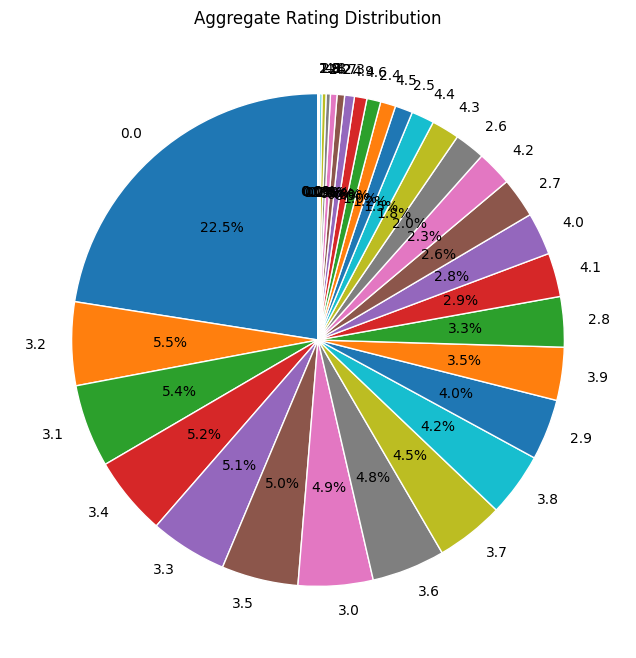


Linear Regression Model Performance:
Mean Squared Error: 1.1201694876761883
R-squared: 0.5108498967311826

Decision Tree Regressor Model Performance:
Mean Squared Error: 0.05508119434258773
R-squared: 0.9759474149249144

Feature Importance based on Decision Tree Regressor:
                 Feature  Importance
19                 Votes    0.899770
17          Rating color    0.086267
18           Rating text    0.002563
0          Restaurant ID    0.002208
4                Address    0.001556
7              Longitude    0.001306
1        Restaurant Name    0.001219
9               Cuisines    0.001203
8               Latitude    0.001125
10  Average Cost for two    0.001069
5               Locality    0.000560
6       Locality Verbose    0.000545
13   Has Online delivery    0.000280
3                   City    0.000136
16           Price range    0.000074
12     Has Table booking    0.000059
14     Is delivering now    0.000026
11              Currency    0.000018
2           Country Co

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# dataset
df = pd.read_csv('/content/Dataset .csv')

# Drop missing values
df.dropna(inplace=True)

# Display dataset summary
print("Dataset Information:")
df.info()
print("\nDataset Description:")
print(df.describe())

# Encode categorical features with binary labels (1 for yes, 0 for no)
binary_cols = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Encode other categorical columns
label_encode_cols = ['Rating color', 'Rating text']
for col in label_encode_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Additional encoding for any other non-numeric columns
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Check if there are still any missing values
print("\nMissing values after processing:")
print(df.isna().sum())

# Display pie chart for 'Aggregate rating' distribution
plt.figure(figsize=(10, 8))  # Increase figure size
df['Aggregate rating'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Limit percentage decimal places for clarity
    startangle=90,  # Start angle for better alignment
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}  # Add spacing between slices
)
plt.ylabel('')  # Remove y-axis label for aesthetics
plt.title('Aggregate Rating Distribution')
plt.show()

# Define features (X) and target (y)
X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Calculate accuracy metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("\nLinear Regression Model Performance:")
print("Mean Squared Error:", mse_lr)
print("R-squared:", r2_lr)

# Initialize and train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy metrics for Decision Tree Regressor
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("\nDecision Tree Regressor Model Performance:")
print("Mean Squared Error:", mse_dt)
print("R-squared:", r2_dt)

# Feature importance analysis for Decision Tree Regressor
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance based on Decision Tree Regressor:")
print(feature_importance)
